                                                text  label
0  So there is no way for me to plug it in here i...  False
1                         Good case, Excellent value   True
2                              Great for the jawbone   True
3  Tied to charger for conversations lasting more...  False
4                                   The mic is great   True
Accuracy: 0.8150
F1 Score: 0.8103
ROC AUC: 0.8986
RMSE: 0.4301


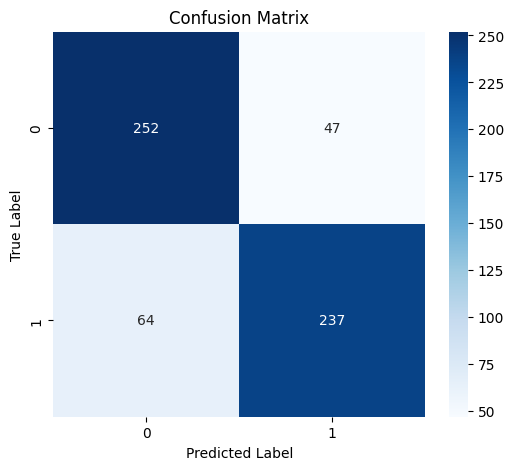

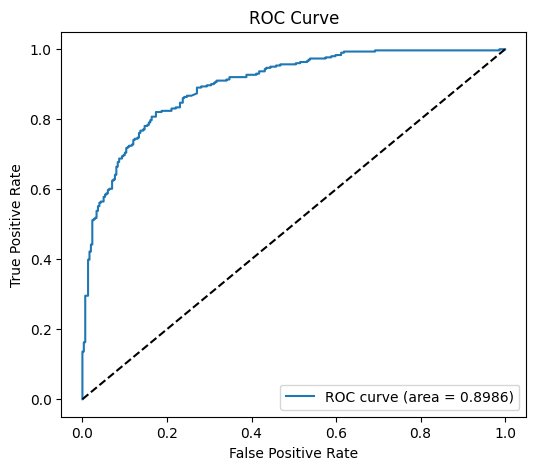

Misclassified Examples:
                                                   Text  True Label  \
1190  Garbo, who showed right off the bat that her t...           1   
1817  You will leave the theater wanting to go out a...           1   
2505                   I would not recommend this place           0   
408                  Plantronics Bluetooth Excelent Buy           1   
52    A usable keyboard actually turns a PDA into a ...           1   
1763  I liked the way Dustin Hoffman's character was...           1   
2083                                 This place has it!           1   
1241  This would not even be good as a made for TV f...           0   
1005  The rest of the movie lacks art, charm, meanin...           0   
1583  It failed to convey the broad sweep of landsca...           0   

      Predicted Label  
1190                0  
1817                0  
2505                1  
408                 0  
52                  0  
1763                0  
2083                0  
12

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, mean_squared_error,
    confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/content/merged_output.csv')

print(df.head())

df['label'] = df['label'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
y_proba = model.predict_proba(X_test_vec)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"RMSE: {rmse:.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

error_df = pd.DataFrame({'Text': X_test, 'True Label': y_test, 'Predicted Label': y_pred})
errors = error_df[error_df['True Label'] != error_df['Predicted Label']]
print("Misclassified Examples:")
print(errors.head(10))

errors.to_csv('misclassified_examples.csv', index=False)
